In [210]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , RobustScaler , QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV

In [140]:
df = pd.read_csv('/Users/raidneghiz/Documents/Supervised_Learning_Classification/African_crises_dataset.csv')
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [142]:
df.shape

(1059, 14)

In [143]:
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [144]:
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
def plots(df):
    figure = make_subplots(2,7)
    for i , column in enumerate(df.columns) :
        row = (i//7)+1
        col = (i%7)+1
        figure.add_trace(go.Box(y=df[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000 , showlegend = False)
    figure.show()

plots(df)


In [147]:
num_values = df.select_dtypes(exclude= 'object')
num_values

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1054,70,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0
1055,70,2010,0,378.200000,1,1,0.0,3.217000,1,0,0
1056,70,2011,0,361.900000,1,1,0.0,4.920000,1,0,0
1057,70,2012,0,361.900000,1,1,0.0,3.720000,1,0,0


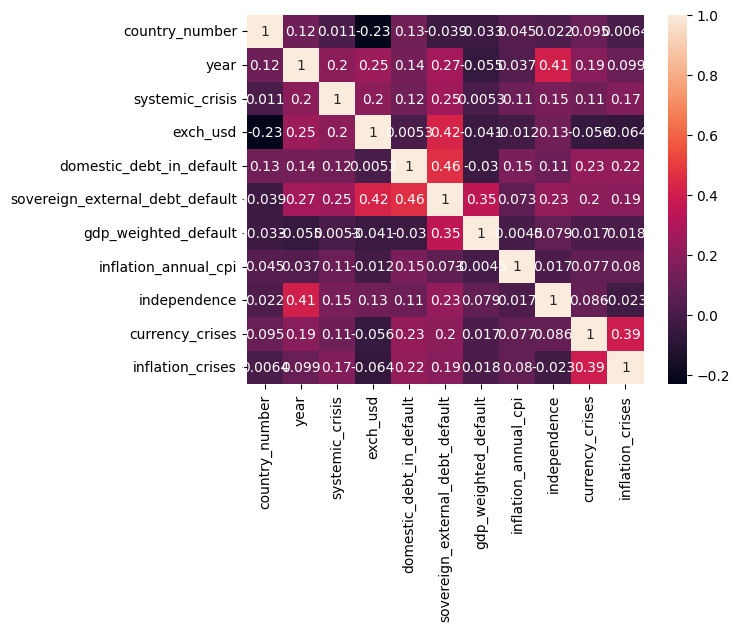

In [148]:
corr = num_values.corr()

heatmap = sns.heatmap(corr , annot = True)

In [149]:
df['country_code'].unique()

array(['DZA', 'AGO', 'CAF', 'CIV', 'EGY', 'KEN', 'MUS', 'MAR', 'NGA',
       'ZAF', 'TUN', 'ZMB', 'ZWE'], dtype=object)

In [150]:
country_codes = {
    "DZA" : 1 ,
    "AGO" : 2 ,
    "CAF" : 3 ,
    "CIV" : 4 ,
    "EGY" : 5 ,
    "KEN" : 6 ,
    "MUS" : 7 ,
    "MAR" : 8 ,
    "NGA" : 9 ,
    "ZAF" : 10 ,
    "TUN" : 11 ,
    "ZMB" : 12 ,
    "ZWE" : 13
}

In [151]:
df['country_code'] = df['country_code'].map(country_codes)

In [152]:
df['country_code']

0        1
1        1
2        1
3        1
4        1
        ..
1054    13
1055    13
1056    13
1057    13
1058    13
Name: country_code, Length: 1059, dtype: int64

In [153]:
df['country'].unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [154]:
countries = {
    "Algeria" : 1 ,
    "Angola" : 2 ,
    "Central African Republic" : 3 ,
    "Ivory Coast" : 4 ,
    "Egypt" : 5 ,
    "Kenya" : 6 ,
    "Mauritius" : 7 ,
    "Morocco" : 8 ,
    "Nigeria" : 9 ,
    "South Africa" : 10 ,
    "Tunisia" : 11 ,
    "Zambia" : 12 ,
    "Zimbabwe" : 13 }

In [155]:
df['country'] = df['country'].map(countries)

In [156]:
banking_crisis = {
    "crisis" : 1 ,
    "no_crisis" : 0
} 

df['banking_crisis'] = df['banking_crisis'].map(banking_crisis)

In [158]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,1,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,1,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,1,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


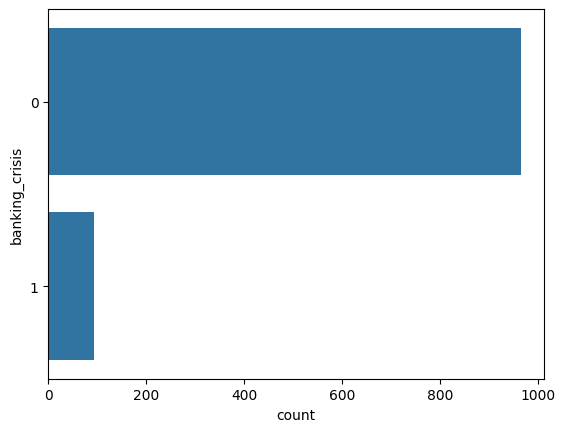

In [209]:
plot = sns.countplot(df , y= df['banking_crisis'])

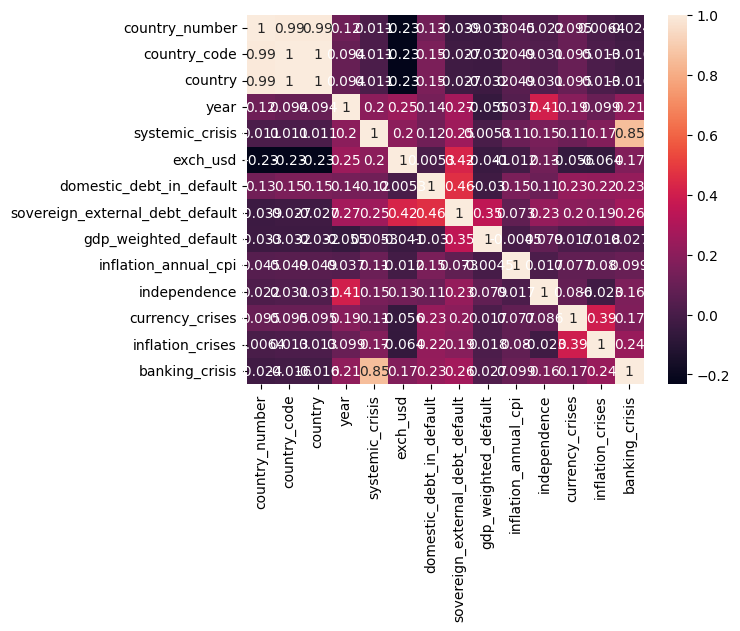

In [159]:
corr1 = df.corr()
heatmap2 = sns.heatmap(corr1 , annot =True)

In [161]:
df = df.drop(columns=['country_number' , 'country'])

**LOGISTIC REGRESSION**

In [162]:
df1 =df.copy()

In [163]:
df1 = df1[['exch_usd' , 'gdp_weighted_default']]
df1

,exch_usd,gdp_weighted_default
0,0.052264,0.0
1,0.052798,0.0
2,0.052274,0.0
3,0.051680,0.0
4,0.051308,0.0
...,...,...
1054,354.800000,0.0
1055,378.200000,0.0
1056,361.900000,0.0
1057,361.900000,0.0


In [164]:
q = QuantileTransformer()
df1 = q.fit_transform(df1)
df1

array([[0.24121348, 0.        ],
       [0.24326309, 0.        ],
       [0.24148386, 0.        ],
       ...,
       [0.96746747, 0.        ],
       [0.96746747, 0.        ],
       [0.96746747, 0.        ]])

In [165]:
df1 = pd.DataFrame(df1 , columns= ['exch_usd' , 'gdp_weighted_default'])
df1

,exch_usd,gdp_weighted_default
0,0.241213,0.0
1,0.243263,0.0
2,0.241484,0.0
3,0.233406,0.0
4,0.231771,0.0
...,...,...
1054,0.965969,0.0
1055,0.970153,0.0
1056,0.967467,0.0
1057,0.967467,0.0


In [166]:
df_without_scaling = df.drop(columns= ['exch_usd' , 'gdp_weighted_default'])
df_without_scaling

,country_code,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0,0,3.441456,0,0,0,1
1,1,1871,0,0,0,14.149140,0,0,0,0
2,1,1872,0,0,0,-3.718593,0,0,0,0
3,1,1873,0,0,0,11.203897,0,0,0,0
4,1,1874,0,0,0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1054,13,2009,1,1,1,-7.670000,1,1,0,1
1055,13,2010,0,1,1,3.217000,1,0,0,0
1056,13,2011,0,1,1,4.920000,1,0,0,0
1057,13,2012,0,1,1,3.720000,1,0,0,0


In [167]:
new_df = pd.concat([df_without_scaling , df1] ,  axis= 1 , join= 'inner')
new_df

,country_code,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,exch_usd,gdp_weighted_default
0,1,1870,1,0,0,3.441456,0,0,0,1,0.241213,0.0
1,1,1871,0,0,0,14.149140,0,0,0,0,0.243263,0.0
2,1,1872,0,0,0,-3.718593,0,0,0,0,0.241484,0.0
3,1,1873,0,0,0,11.203897,0,0,0,0,0.233406,0.0
4,1,1874,0,0,0,-3.848561,0,0,0,0,0.231771,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,13,2009,1,1,1,-7.670000,1,1,0,1,0.965969,0.0
1055,13,2010,0,1,1,3.217000,1,0,0,0,0.970153,0.0
1056,13,2011,0,1,1,4.920000,1,0,0,0,0.967467,0.0
1057,13,2012,0,1,1,3.720000,1,0,0,0,0.967467,0.0


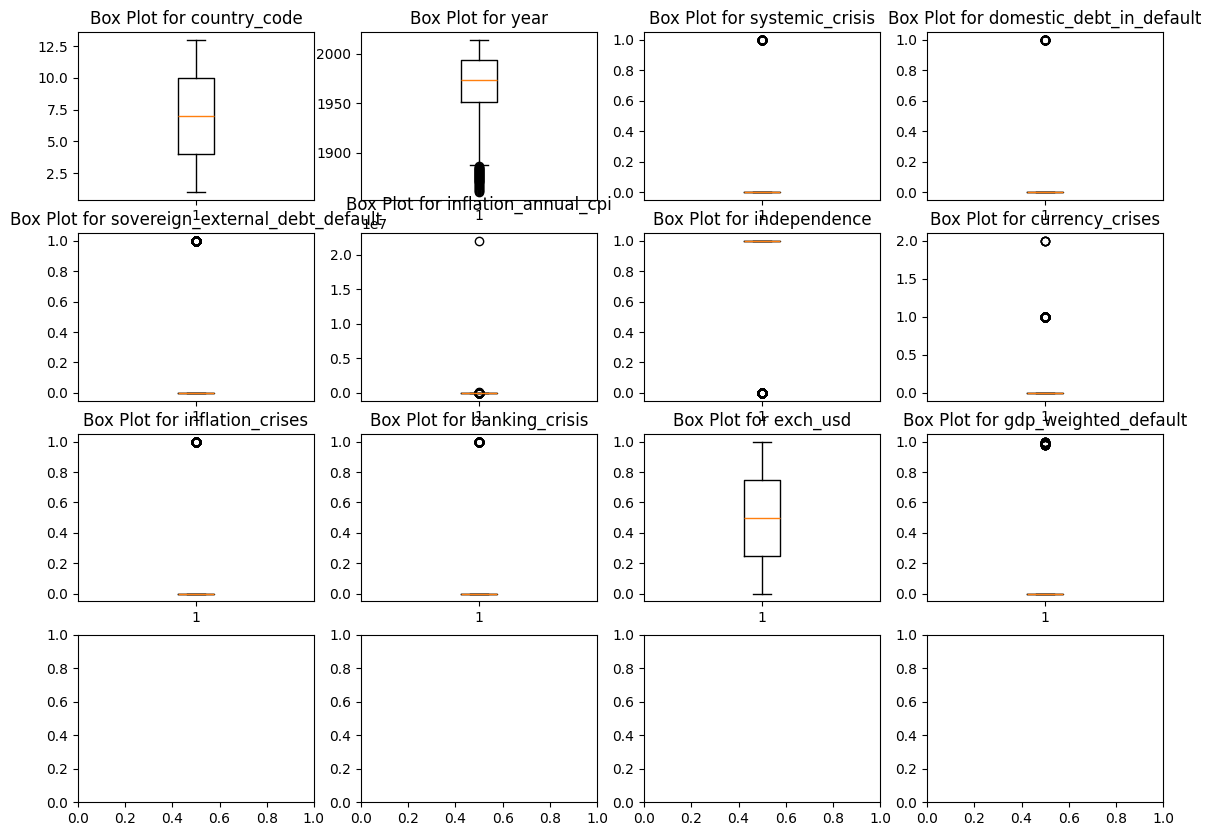

In [168]:
def boxplot(df):
    fig, axs = plt.subplots(int(df.shape[1] / 4) +1, 4, figsize=(14,10))

    for i, column in enumerate(df.columns):
        ax = axs[i // 4, i % 4]

        ax.boxplot(df[column])
        ax.set_title(f"Box Plot for {column}")
    plt.show()

boxplot(new_df)

In [169]:
x = new_df.drop(columns= 'systemic_crisis')
y = new_df['systemic_crisis']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [171]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [172]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

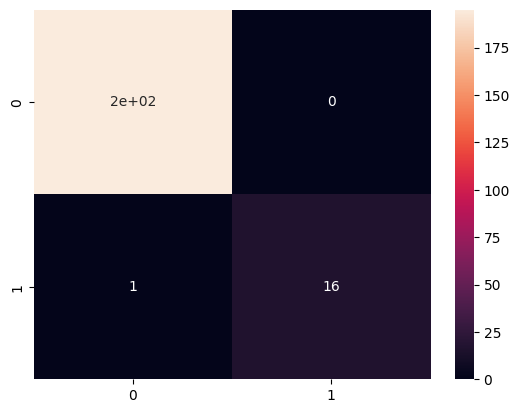

In [173]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True)

In [203]:
metrics.accuracy_score(y_test, y_pred)

0.9952830188679245

In [206]:
clreport1 = classification_report(y_test , y_pred)
print(clreport1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       195
           1       1.00      0.94      0.97        17

    accuracy                           1.00       212
   macro avg       1.00      0.97      0.98       212
weighted avg       1.00      1.00      1.00       212



**KNN**

In [175]:
X1 = df.drop(columns= 'systemic_crisis')
Y1 = df['systemic_crisis']

In [176]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)

In [187]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X1_train, y1_train)

Y1_pred = knn.predict(X1_test)


In [188]:
accuracy = accuracy_score(Y1_pred, y1_test)
accuracy

0.9245283018867925

<Axes: >

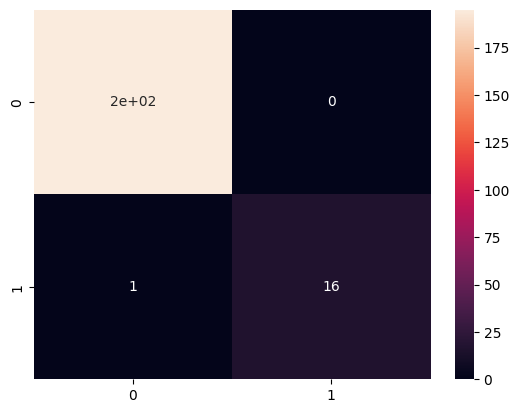

In [189]:
conf_mat1 = confusion_matrix(Y1_pred, y1_test)

sns.heatmap(conf_mat, annot=True)

**DECISION TREE**

In [190]:
X2 = df.drop(columns= 'systemic_crisis')
Y2 = df['systemic_crisis']

In [191]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.2, random_state=42)

In [192]:
d_tree =  DecisionTreeClassifier(max_depth=4) # accuracy = 97% lorsque max_depth = 3
d_tree.fit(X2_train ,y2_train )

DecisionTreeClassifier(max_depth=4)

In [193]:
y2_pred = d_tree.predict(X2_test)

In [194]:
tree_accuracy = accuracy_score(y2_pred , y2_test)
print(tree_accuracy)

0.9905660377358491


<Axes: >

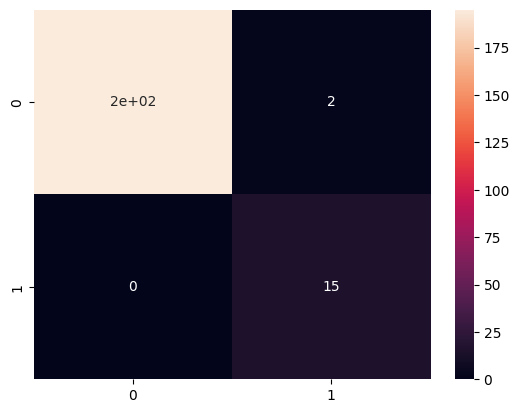

In [195]:
tree_conf_mat = confusion_matrix(y2_pred , y2_test)
sns.heatmap(tree_conf_mat , annot= True)

**RANDOM FOREST**

In [196]:
X3 = df.drop(columns= 'systemic_crisis')
Y3 = df['systemic_crisis']

In [197]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,Y3, test_size=0.2, random_state=42)

In [198]:
forest = RandomForestClassifier(n_estimators=4)

In [199]:
forest.fit(X3_train , y3_train)

RandomForestClassifier(n_estimators=4)

In [200]:
y3_pred = forest.predict(X3_test)

In [201]:
forest_accuracy = accuracy_score(y3_pred , y3_test)
forest_accuracy

0.9905660377358491

<Axes: >

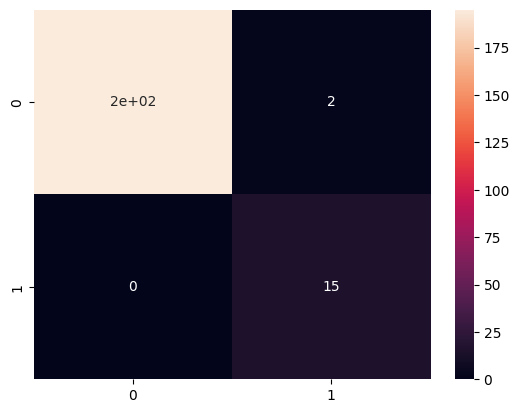

In [202]:
forest_conf_mat = confusion_matrix(y3_pred , y3_test)
sns.heatmap(forest_conf_mat , annot= True)

**KNN GRIDSEARCH**

In [219]:
new_knn = KNeighborsClassifier()

parameters = {
    "n_neighbors" : [7,9,10,13,16,19,20,23 , 24]
}

grid_search = GridSearchCV(new_knn , parameters , scoring= 'accuracy')


In [220]:
X4 = df.drop(columns= 'systemic_crisis')
Y4 = df['systemic_crisis']

In [221]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,Y4, test_size=0.2, random_state=42)

In [222]:
fit = grid_search.fit(X4_train , y4_train)

In [223]:
fit.best_score_

np.float64(0.9256387051862165)

In [224]:
fit.best_params_

{'n_neighbors': 7}

In [228]:
predictions = fit.predict(X4_test)

In [229]:
accuracy_new_knn = accuracy_score(y4_test,predictions)

In [230]:
print(accuracy_new_knn)

0.9150943396226415
